In [1]:
# Name: Yihsuan Sun
# Email: yihsuan.sun88@gmail.com

In [2]:
# Internship Batch: LISUM09
# Submission date: 07/02/2022
# Submitted to: Data Glacier Internship

In [6]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
df0 = pd.read_csv("Train.csv")

In [9]:
# Some columns contain NA values
df0.isna().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [10]:
#Drop column "ult_fec_cli_1t" and "conyuemp" because all values are NAN
del df0['ult_fec_cli_1t']
del df0['conyuemp']

In [11]:
#Remove all rows which has NA value. Now there is no NA value in data

df = df0.dropna()
df.isna().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [12]:
#Change data types of "age" and "antiguedad" to numeric
df["age"] = pd.to_numeric(df["age"])
df["antiguedad"] = pd.to_numeric(df["antiguedad"])

In [14]:
#list all columns
col_list = df.columns.values.tolist()
col_list

['fecha_dato',
 'ncodpers',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'ind_nuevo',
 'antiguedad',
 'indrel',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [15]:
#For all columns with numeric datatype, remove outliers
for i in col_list:
    if is_numeric_dtype(df[i]):
        print(i, "is_numeric_dtype")
        if df[i].std() != 0:
            df = df[(np.abs(stats.zscore(df[i])) < 3)]
        print("num columns in df: ", df.shape[0])

ncodpers is_numeric_dtype
num columns in df:  10795392
age is_numeric_dtype
num columns in df:  10738522
ind_nuevo is_numeric_dtype
num columns in df:  10480736
antiguedad is_numeric_dtype
num columns in df:  10480702
indrel is_numeric_dtype
num columns in df:  10474360
tipodom is_numeric_dtype
num columns in df:  10474360
cod_prov is_numeric_dtype
num columns in df:  10474360
ind_actividad_cliente is_numeric_dtype
num columns in df:  10474360
renta is_numeric_dtype
num columns in df:  10433455
ind_ahor_fin_ult1 is_numeric_dtype
num columns in df:  10432206
ind_aval_fin_ult1 is_numeric_dtype
num columns in df:  10431912
ind_cco_fin_ult1 is_numeric_dtype
num columns in df:  10431912
ind_cder_fin_ult1 is_numeric_dtype
num columns in df:  10427450
ind_cno_fin_ult1 is_numeric_dtype
num columns in df:  9490958
ind_ctju_fin_ult1 is_numeric_dtype
num columns in df:  9381413
ind_ctma_fin_ult1 is_numeric_dtype
num columns in df:  9303592
ind_ctop_fin_ult1 is_numeric_dtype
num columns in df:  93

In [19]:
EI = df.groupby(['ind_empleado'])['ncodpers'].count()
EIdf = EI.to_frame()

EIdf

,ncodpers
ind_empleado,
A,122
B,1069
F,640
N,7203742


array([<AxesSubplot:ylabel='ncodpers'>], dtype=object)

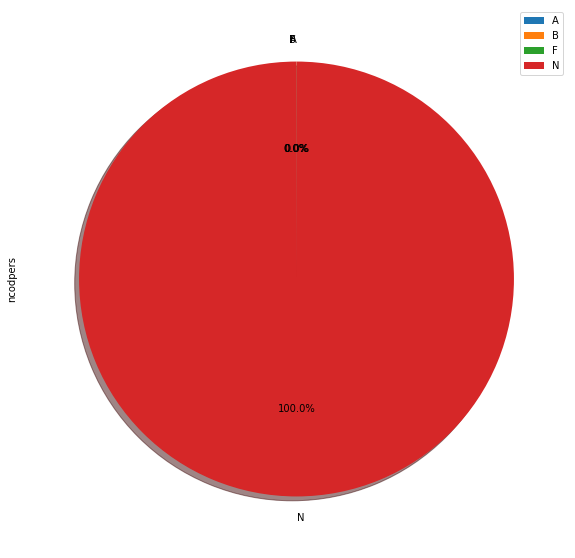

In [20]:
EIdf.groupby(['ind_empleado']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [21]:
sexo = df.groupby(['sexo'])['ncodpers'].count()
sexodf = sexo.to_frame()

sexodf

,ncodpers
sexo,
H,3421063
V,3784510


array([<AxesSubplot:ylabel='ncodpers'>], dtype=object)

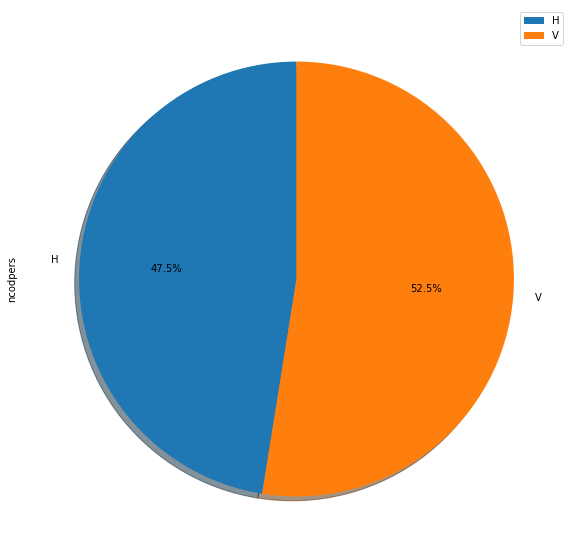

In [22]:
sexodf.groupby(['sexo']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='age', ylabel='antiguedad'>

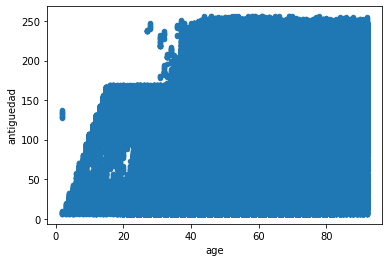

In [28]:
df.plot.scatter(x='age', y='antiguedad', colormap='viridis')

<AxesSubplot:xlabel='age', ylabel='renta'>

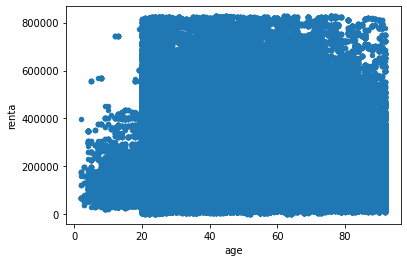

In [29]:
df.plot.scatter(x='age', y='renta', colormap='viridis')

In [30]:
nomprov = df.groupby(['nomprov'])['ncodpers'].count()
nomprovdf = nomprov.to_frame()

nomprovdf

,ncodpers
nomprov,
ALAVA,5
ALBACETE,77945
ALICANTE,162647
ALMERIA,30581
ASTURIAS,148461
AVILA,22670
BADAJOZ,128064
"BALEARS, ILLES",45551
BARCELONA,760799


array([<AxesSubplot:ylabel='ncodpers'>], dtype=object)

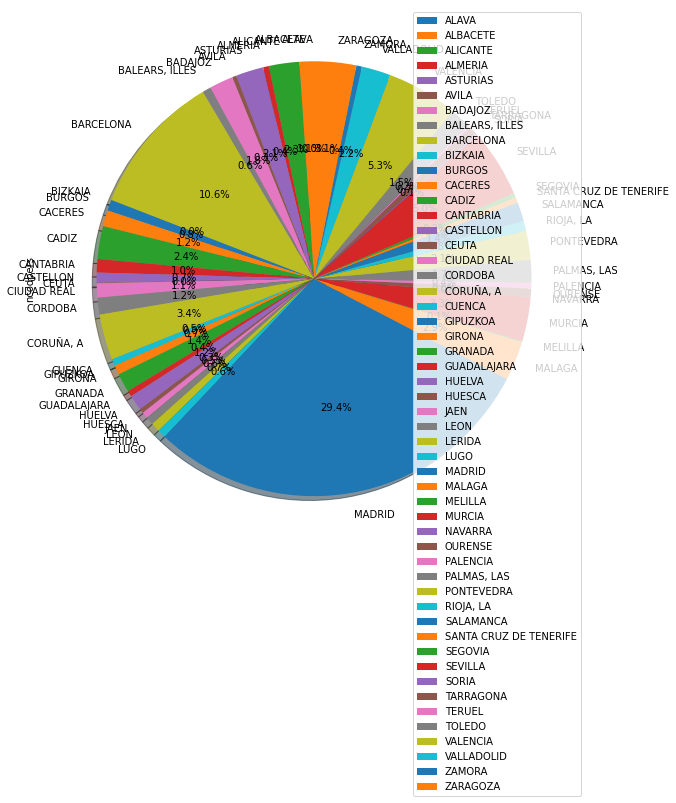

In [31]:
nomprovdf.groupby(['nomprov']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='age', ylabel='nomprov'>

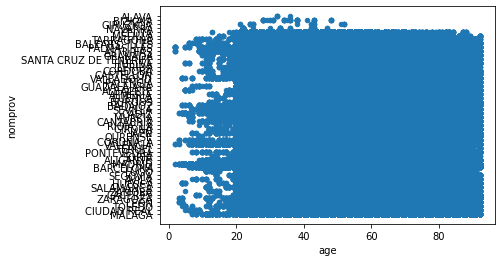

In [34]:
df.plot.scatter(x='age', y='nomprov', colormap='viridis')

(array([2.095000e+03, 8.297000e+03, 3.106239e+06, 8.127710e+05,
        1.182285e+06, 8.966490e+05, 4.982160e+05, 3.526480e+05,
        2.152160e+05, 1.311570e+05]),
 array([ 2., 11., 20., 29., 38., 47., 56., 65., 74., 83., 92.]),
 <BarContainer object of 10 artists>)

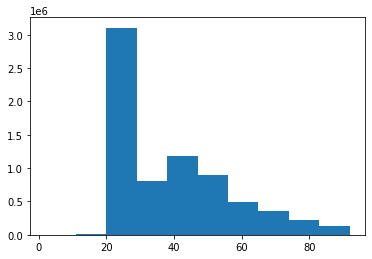

In [36]:
plt.hist(df['age'])

(array([2217351., 1924729.,  250436.,  526336.,  584579.,  474986.,
         706865.,  277402.,  175847.,   67042.]),
 array([  6.,  31.,  56.,  81., 106., 131., 156., 181., 206., 231., 256.]),
 <BarContainer object of 10 artists>)

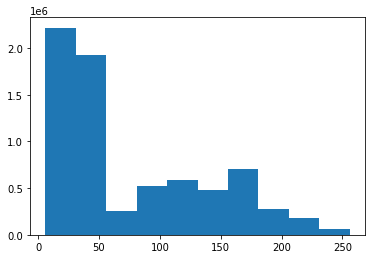

In [37]:
plt.hist(df['antiguedad'])

<AxesSubplot:xlabel='ind_empleado', ylabel='count'>

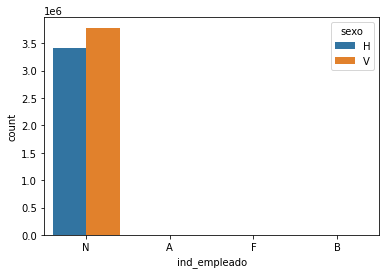

In [38]:
sns.countplot(x="ind_empleado", hue="sexo", data=df)

<AxesSubplot:xlabel='nomprov', ylabel='count'>

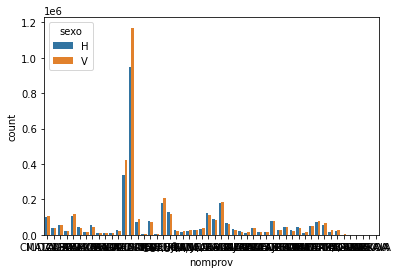

In [40]:
sns.countplot(x="nomprov", hue="sexo", data=df)

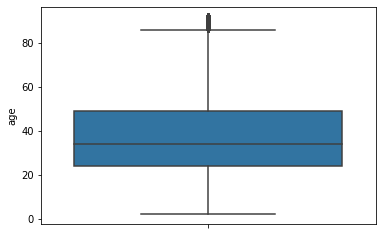

In [41]:
sns.boxplot( y=df["age"] );
plt.show()

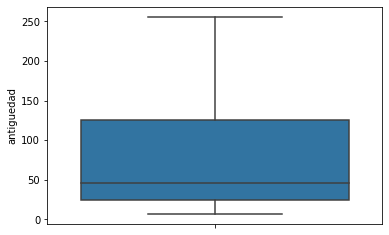

In [42]:
sns.boxplot( y=df["antiguedad"] );
plt.show()

In [45]:
dfh = df.iloc[:, 0:11]

<AxesSubplot:>

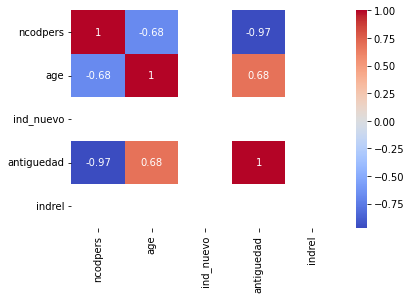

In [46]:
sns.heatmap(dfh.corr(),cmap = 'coolwarm',annot = True)